In [1]:
import numpy as np # linear algebra
import pandas as pd


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow import keras
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [4]:
train_path = 'D:\\SE-Projects\\E-learning platform\\Backend\\app\\dataset\\Dataset454\\train\\'
valid_path = 'D:\\SE-Projects\\E-learning platform\\Backend\\app\\dataset\\Dataset454\\valid\\'
test_path  = 'D:\\SE-Projects\\E-learning platform\\Backend\\app\\dataset\\Dataset454\\test\\'

In [5]:
def draw_plot(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper left')
    plt.show()

In [6]:
img_height=80
img_weight=80

In [7]:
sinhala_classes=["අ","ආ","ඇ"
            
]

In [8]:
train_batches = ImageDataGenerator().flow_from_directory(
    directory=train_path, target_size=(img_height,img_weight), batch_size=32 ,color_mode="grayscale")
valid_batches = ImageDataGenerator().flow_from_directory(
    directory=valid_path, target_size=(img_height,img_weight), batch_size=32,color_mode="grayscale")
test_batches = ImageDataGenerator().flow_from_directory(
    directory=test_path, target_size=(img_height,img_weight), batch_size=32,color_mode="grayscale", shuffle=False)

Found 576 images belonging to 3 classes.
Found 72 images belonging to 3 classes.
Found 72 images belonging to 3 classes.


In [ ]:
print(train_batches[0][0].shape)


AttributeError: 'tuple' object has no attribute 'shape'

In [23]:
images,lables =next(train_batches)
lables[0].shape
images[0].shape

(80, 80, 1)

In [10]:
import keras.utils as image


In [11]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(img_height, img_height),
  tf.keras.layers.Rescaling(1./255)
])

In [12]:
data_augmentation = tf.keras.Sequential([
   tf.keras.layers.RandomRotation(0.1,fill_mode="constant",seed=20),

])

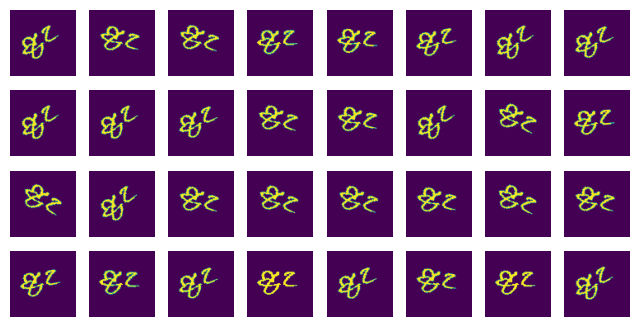

In [13]:
plt.figure(figsize=(8, 4))
for i in range(32):
    augmented_image = data_augmentation(images)
    ax = plt.subplot(4, 8, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [14]:
def create_model():
    model= Sequential([
    Input(shape=(img_height,img_height,1)), 
    resize_and_rescale,
#     data_augmentation,
    Conv2D(filters =32 , kernel_size= (7,7) ,activation = 'relu' ,padding='same' ),
    Conv2D(filters =32 , kernel_size= (7,7) ,activation = 'relu' ,padding='same' ),
#     BatchNormalization() ,
    MaxPool2D(pool_size=(8,8) ,strides=(2,2) ),
    
    Conv2D(filters =64 , kernel_size= (7,7) ,activation = 'relu' ,padding='same'),
    Conv2D(filters =64 , kernel_size= (7,7) ,activation = 'relu' ,padding='same'),
    MaxPool2D(pool_size=(2,2) ,strides=(2,2) ),
        
    Conv2D(filters =128 , kernel_size= (7,7) ,activation = 'relu' ,padding='same'),
        
        
    Flatten(),
    Dense(units=1000, activation='relu'),

    Dense(units=len(sinhala_classes), activation='softmax')
    
    ])
    model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
def model_train(model,save_name,epoch):
    history=model.fit(
    x=train_batches, 
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    epochs=epoch,
    verbose=0)
    
    draw_plot(history)
    
    model.save(save_name+'.h5')
    model.evaluate(test_batches)

In [16]:
model =create_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 80, 80, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 80, 80, 32)     │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 80, 80, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 64)     │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 64)     │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 18, 18, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │    41,473,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,003 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,230,531 (161.10 MB)

 Trainable params: 42,230,531 (161.10 MB)

 Non-trainable params: 0 (0.00 B)

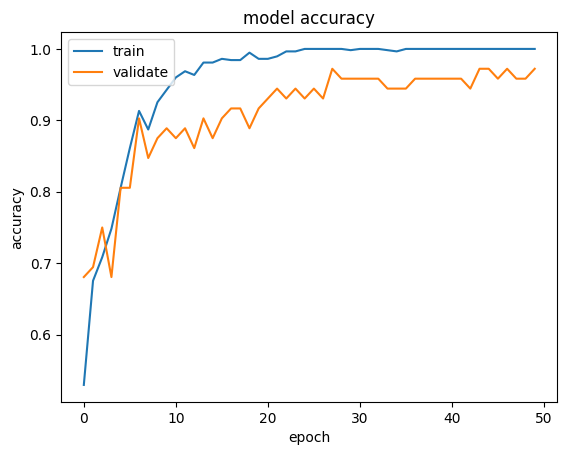

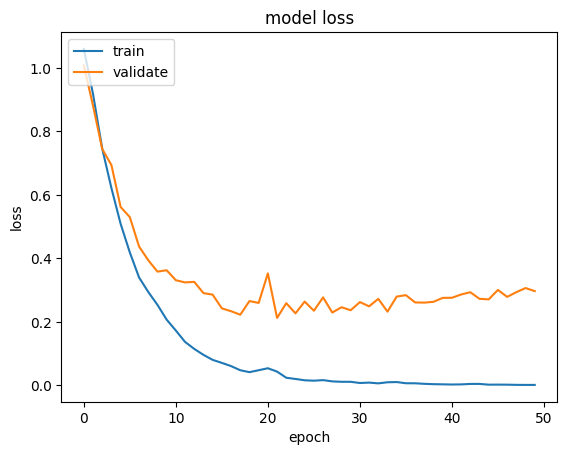

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.9444 - loss: 0.6606


In [17]:
model_train(model,'model_test',50)


In [22]:
import tkinter as tk
from PIL import ImageGrab
import numpy as np

def draw(event):
    x, y = event.x, event.y
    canvas.create_oval(x, y, x+14, y+14, fill="white", outline="white")

def clear_canvas():
    canvas.delete("all")

def predict_letter():
    x = root.winfo_rootx() + canvas.winfo_x()
    y = root.winfo_rooty() + canvas.winfo_y()
    x1 = x + canvas.winfo_width()
    y1 = y + canvas.winfo_height()

    img = ImageGrab.grab(bbox=(x, y, x1, y1)).convert("L")
    img = img.resize((80, 80))

    img = np.array(img) / 255.0
    img = img.reshape(1, 80, 80, 1)

    pred = model.predict(img)
    print("Prediction Probabilities:", pred)
    print("Predicted:", sinhala_classes[np.argmax(pred)])

root = tk.Tk()
root.title("Sinhala Letter Recognition")

canvas = tk.Canvas(root, width=300, height=300, bg="black")
canvas.pack()

canvas.bind("<B1-Motion>", draw)

btn_frame = tk.Frame(root)
btn_frame.pack()

tk.Button(btn_frame, text="Predict", command=predict_letter).pack(side="left", padx=10)
tk.Button(btn_frame, text="Clear", command=clear_canvas).pack(side="left", padx=10)

root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Prediction Probabilities: [[0.27563488 0.33218238 0.3921828 ]]
Predicted: ඇ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction Probabilities: [[0.2670414  0.32170781 0.41125074]]
Predicted: ඇ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prediction Probabilities: [[0.30043796 0.3113149  0.38824716]]
Predicted: ඇ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction Probabilities: [[0.2901267  0.32220626 0.38766706]]
Predicted: ඇ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediction Probabilities: [[0.2901267  0.32220626 0.38766706]]
Predicted: ඇ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Prediction Probabilities: [[0.2901267  0.32220626 0.38766706]]
Predicted: ඇ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction Probabilities: [[0.2901267  0.32220626 0.38766706]]
Predicted: ඇ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction Probabilities: [[0.27839744 0.32650873 0.3950938 ]]
Predicted: ඇ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Prediction Probabilities: [[0.28232196 0.3307621  

KeyboardInterrupt: 